PCA - Principle Component Analysis

In this lab, we are going to implement PCA. Let's start by importing numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load Iris dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Note that the data is in a four dimensional space, meaning the number of features is 4. The idea is to project the data into a lower dimensional space. This can be useful for various reasons, including computational efficiency. 

In [3]:
print(X.shape)

(150, 4)


Let's look at the dataset by plotting feature 0 and 1

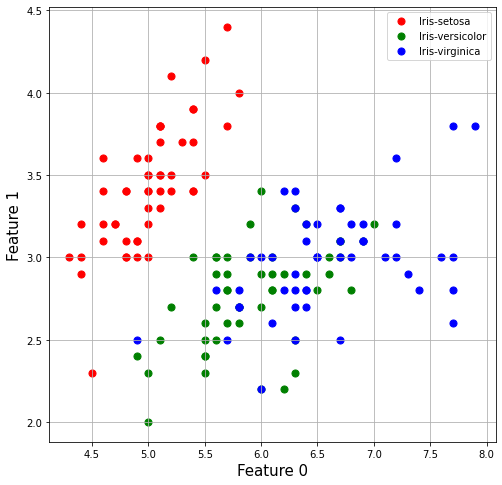

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Feature 0', fontsize=15)
ax.set_ylabel('Feature 1', fontsize=15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color, label in zip(targets, colors, [0, 1, 2]):
    ax.scatter(X[y == label][:, 0]
               , X[y == label][:, 1]
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()


Now let's implement PCA. 

1. We first will centralize the data. This is basically done by subtracting off the mean for each column.
2. Then we want to obtain the principal directions (which, in particular, form an orthogonal basis (unit norm vectors that are orthogonal to each other)).For this, we calculate Eigenvectors and Eigenvalues. One way to do so is to use covariance matrix or perform Singular Value Decomposition (SVD). SVD is basically a way to represent a matrix ($M$) by product of 3 matrices ($U \times \Sigma \times V^T$). We can extract what we want from this factorization, by looking at $U$, in which, columns are eigenvectors of $MM^T$. We also will find Eigenvectors and Eigenvalues using covariance matrix. (refer to the reference in course website for more details)
3. Select the eigenvectors we want to use to transform the data
4. Construct transformed data from seleceted eigenvectors

In [5]:
# Step 1, centeralizign the data
mean_vec = np.mean(X, axis=0)
X_std = X - mean_vec

In [6]:
# Step 2, calculating covariance matrix
cov_mat = (X_std).T.dot((X_std)) / (X_std.shape[0]-1)
print(cov_mat)


[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


the eigenvalues are decreasing and correspond to the variances of the new features (the principal components)

In [42]:
# Computing the eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors', eig_vecs)
print('Eigenvalues', eig_vals)


Eigenvectors [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
Eigenvalues [4.22824171 0.24267075 0.0782095  0.02383509]


In [8]:
# Step 2 (SVD Approach) we can use SVD function as well
U, S, VT = np.linalg.svd(X_std.T)
print(U)
# print(S)
# print(VT)


[[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]


To transform the data into a new $k$ dimensional subspace, we need to select $k$ eigenvectors. Recall that we have 4 principle components for Iris (data is 4 dimensional). We can look at explained variance to figure out which principle components to choose

In [9]:
# Step 3, selecting the eigenvectors
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]


In [10]:
var_exp

[92.46187232017272, 5.306648311706779, 1.71026098079298, 0.5212183873275228]

You can see that first and second components account for almost 98% of the variance, so we can project the data into a 2-dimensional space using these two without losing much information

In [11]:
# the first two eigenvectors 
eig_vecs[:, :2]

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [12]:
# Step 4, transformed data
X_transformed = X_std.dot(eig_vecs[:, :2])

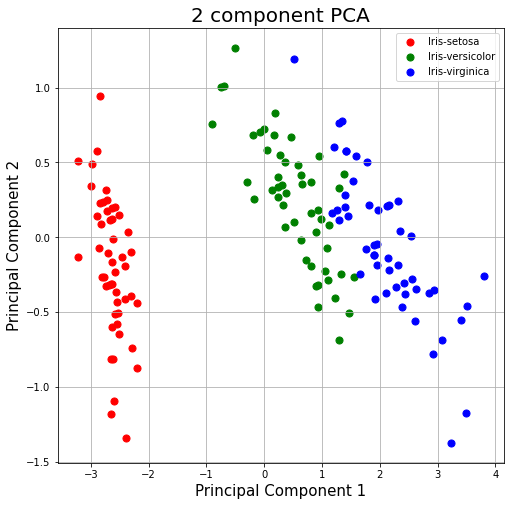

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color, label in zip(targets, colors, [0, 1, 2]):
    ax.scatter(X_transformed[y == label][:, 0]
               , X_transformed[y == label][:, 1]
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()


You can use the 3rd and 4th components (the less representative ones) to transform the data and see how poor they perform

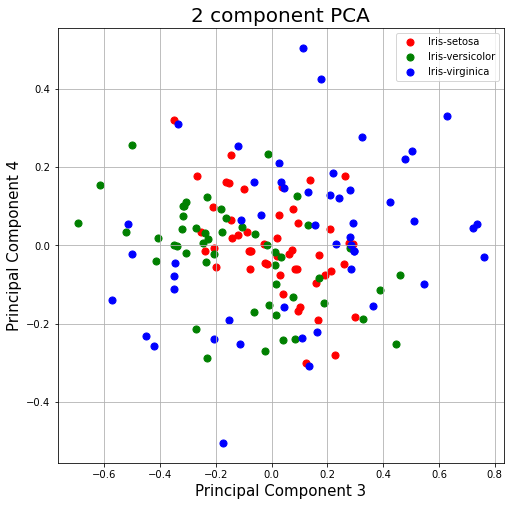

In [14]:
# Step 4, transformed data
X_transformed = X_std.dot(eig_vecs[:, 2:])

# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 3', fontsize=15)
ax.set_ylabel('Principal Component 4', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color, label in zip(targets, colors, [0, 1, 2]):
    ax.scatter(X_transformed[y == label][:, 0]
               , X_transformed[y == label][:, 1]
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()


Now let's quickly use scikit's PCA function to redo everything we did

In [15]:
from sklearn import decomposition

# The next three lines do the job (you can summarize it in 1 line! > decomposition.PCA(n_components=2).fit(X).transform(X))
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

In [16]:
print(X_transformed.shape)
print(X[5:8])
print(X_transformed[5:8])

(150, 2)
[[5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]
[[-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]]


In [17]:
def draw_vector(v0, v1, ax=None):
    ax = ax 
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)



In [18]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


The data looks like this now

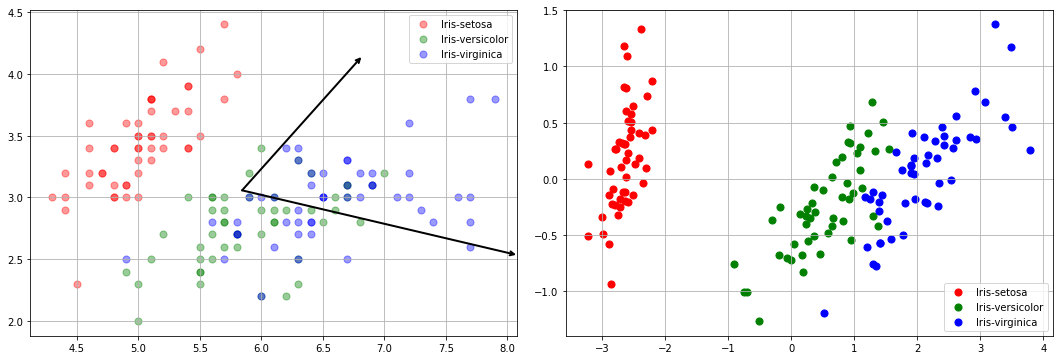

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
colors = ['r', 'g', 'b']
for target, color, label in zip(targets, colors, [0, 1, 2]):
    ax[0].scatter(X[y == label][:, 0]
               , X[y == label][:, 1]
               , c=color
               , s=50,alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_[0:2], pca.mean_[0:2] + v[0:2],ax[0])
ax[0].legend(targets)
ax[0].grid()

### Now lets change the axis (Plot the principal components)
for target, color, label in zip(targets, colors, [0,1,2]):
    ax[1].scatter(X_transformed[y==label][:, 0]
               , X_transformed[y==label][:, 1]
               , c = color
               , s = 50)
ax[1].legend(targets)
ax[1].grid()


# fig.savefig('figures/05.09-PCA-rotation.png')


## Noise Reduction using PCA

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

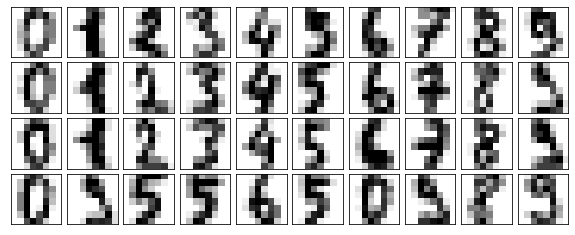

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
plot_digits(digits.data)

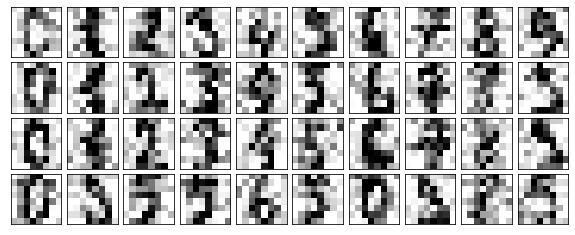

In [22]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.90).fit(noisy)
pca.n_components_

49

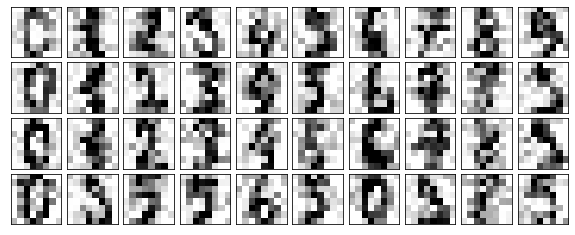

In [24]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# PCA as Eigenface

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.image as mpimg

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [27]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


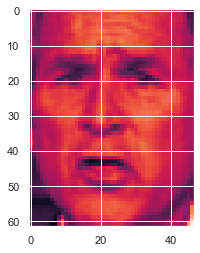

In [28]:
# img = mpimg.imread()
imgplot = plt.imshow(faces.images[2])
plt.show()


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=190)
## YOu can use RandomizedPCA here for speeding up the process
# from sklearn.decomposition import RandomizedPCA
# pca = RandomizedPCA(150)
pca.fit(faces.data)
print(faces.data.shape)


(1348, 2914)


## Let's visualize the first eigenvectors (Principal Components)
They are creepy:


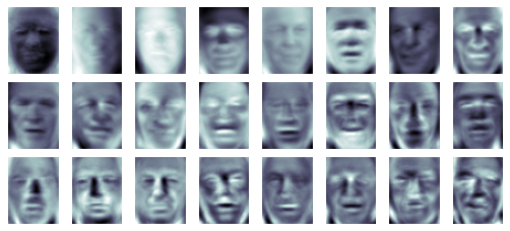

In [30]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

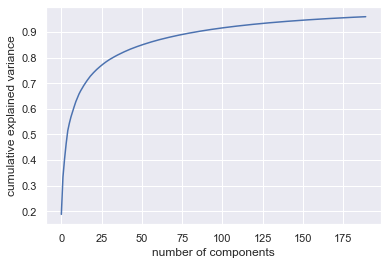

In [31]:
#Finding the number of required components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Let's reconstruct the images

In [32]:

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

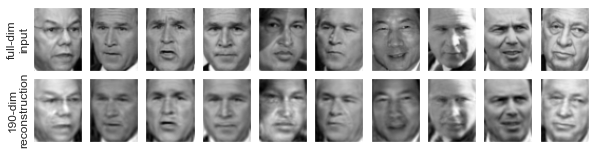

In [33]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('190-dim\nreconstruction');

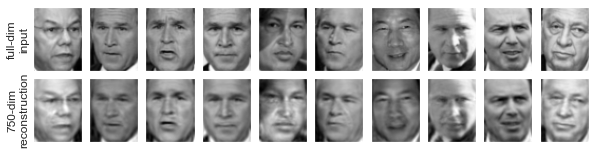

In [34]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('750-dim\nreconstruction');

### Independent Component Analysis

&nbsp;

Independent Component Analysis is an algorithm to obtain a linear combination of the original data source. ICA attempts to decompose the original data into independent subsets. Lets say we know that the observed data is coming from the "linear" combination of independent sources ($X=As$)

* $X$ is the observed data
* s is the source that we aim at finding it. 
* A is the mixing matrix


We denote $W$ as the inverse of mixing matrix $A$. We can get the job done if we "approximate" $W$. Because by multiplying $W$ to both sides we can get the $s$. 

In [35]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import sklearn.decomposition

In [36]:
#Generating 3 source signals
time=np.linspace(0,8,200)

#signal1 sinusoidal signal
#signal2 square signal
#signal3 saw tooth signal
signal1=np.sin(2*time)
signal2=np.sign(np.sin(3*time))
signal3=scipy.signal.sawtooth(2*np.pi*time)
#create matrix
signals=np.c_[signal1,signal2,signal3]

# signals+=0.2*np.random.normal(size=signals.shape)

In [37]:
#Mixing them together 
A=np.array([[1,1,1],[0.5,2,1.0],[1.5,1.0,2.0]])
X=signals@A

In [38]:
#Lets try PCA
from sklearn.decomposition import  PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)


In [39]:
#sklearn fast ica
from sklearn.decomposition import FastICA
clf=FastICA(w_init=np.eye(X.shape[1]))
signals_skl=clf.fit_transform(X)

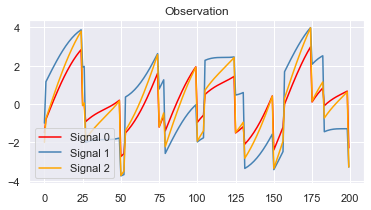

In [40]:
colors=['red','steelblue','orange']
ax=plt.figure(figsize=(6,3)).add_subplot(111)
for ind,var in enumerate(X.T):
    plt.plot(var,label=f'Signal {ind}',c=colors[ind])
plt.title('Observation')
plt.legend()
plt.show()

Text(0.5, 0, 'Estimated_PCA')

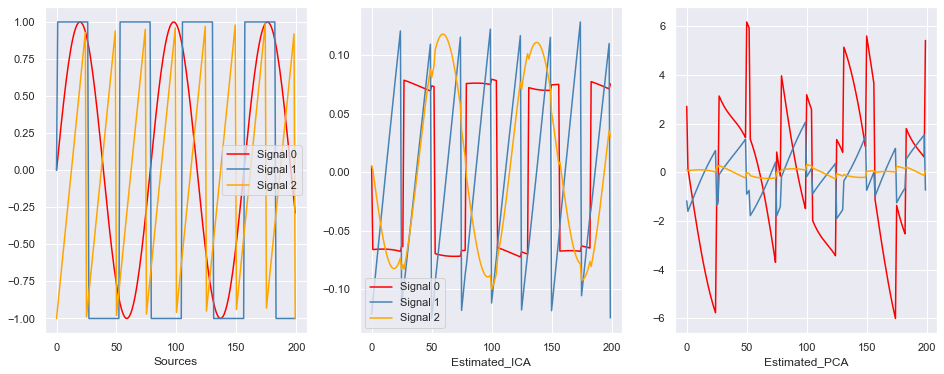

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
# ax=plt.figure(figsize=(6,3)).add_subplot(111)
for ind,var in enumerate(signals.T):
    ax[0].plot(var,label=f'Signal {ind}',c=colors[ind])
ax[0].legend()
ax[0].set_xlabel('Sources')
for ind,var in enumerate(signals_skl.T):
    ax[1].plot(var,label=f'Signal {ind}',c=colors[ind])
ax[1].set_xlabel('Estimated_ICA')
ax[1].legend()
for ind,var in enumerate(H.T):
    ax[2].plot(var,label=f'Signal {ind}',c=colors[ind])
ax[2].set_xlabel('Estimated_PCA')



## ICA in de-mixing Images:

https://www.quora.com/What-is-the-difference-between-PCA-and-ICA
https://github.com/awcasella/ICA-on-Mixed-Images/blob/master/ICA%20applied%20in%20images.ipynb

## conclusion
* Both PCA and ICA are unsupervised learning methods since they do not make use of any labels in the computation.
* Both methods find a new set of basis vectors for the data.
* PCA is more applicable in noise and dimension reductions. 
* ICA is more useful in decompsing input data (multiverse) into independent components (universes)
* PCA maximizes the variance of the projected data along orthogonal directions.
* ICA correctly finds the two vectors onto which the projections are independent.

